## Aplicação Método de RK4 e 3/8 

### Pêndulo Fórçado

$$\frac{dx^2}{dt^2} = -\omega_o^2\sin(x) + A_o\sin(\omega t)$$

Dividindo em duas equações

$$\frac{dv}{dt} = -\omega_o^2\sin(x) + A_o\sin(\omega t)$$
$$ \frac{dx}{dt} =  v$$

### Método 3/8

Pela tabela butcher, algoritmo:
$$k_1 = f(x,t)$$
$$x_{aux} = x + (k_1/3)\Delta t$$
$$k_2 = f(x_{aux},t + \Delta t/3)$$
$$x_{aux} = x + (-k_1/3 + k_2)\Delta t$$
$$k_3 = f(x_{aux},t + 2\Delta t/3)$$
$$x_{aux} = x + (k_1 - k_2 + k_3)\Delta t$$
$$k_4 = f(x_{aux}, t + \Delta t)$$
$$x = x + (1/8)(k_1 + 3k_2 + 3k_3 + k4)\Delta t$$

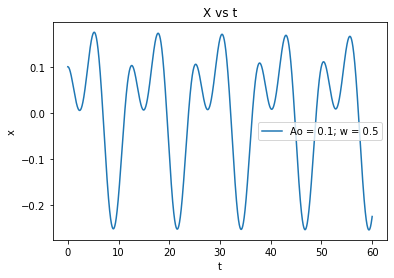

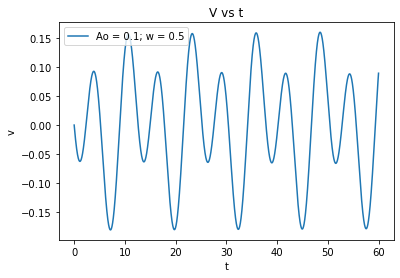

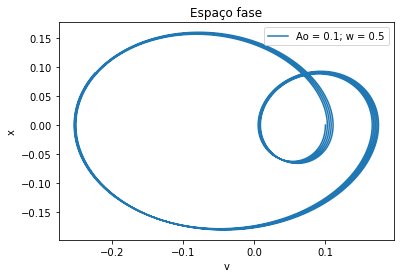

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fV(A_o,w,x,t):
    return (-(w_o**2)*np.sin(x) + A_o*np.sin(w*t))

def fX(v):
    return v

# condições iniciais

l = 10
g = 10
w_o = 1.0
x_o = 0.1
v_o = 0
#A_o = [0.1,0.1,1.0]
#w = [0.1,0.5,0.5]
dt = 0.001
tf=60

x_l = [x_o]
v_l = [v_o]
t_l = [0]

A_o = 0.1

w = 0.5

t = dt  
x = x_o
v = v_o
while(t<tf):
    # Fazer
    k1X = fX(v)
    k1V = fV(A_o,w,x,t)
    xaux = x + k1X*dt/3
    vaux = v + k1V*dt/3
    k2X = fX(vaux)
    k2V = fV(A_o,w,xaux,t+dt/3)
    xaux = x + (-k1X/3 + k2X)*dt
    vaux = v + (-k1V/3 + k2V)*dt
    k3X = fX(vaux)
    k3V = fV(A_o,w,xaux,t+2*dt/3)
    xaux = x + (k1X - k2X + k3X)*dt
    vaux = v + (k1V - k2V + k3X)*dt
    k4X = fX(vaux)
    k4V = fV(A_o,w,xaux,t+dt)
    
    v = v + (1/8)*(k1V + 3*k2V + 3*k3V + k4V)*dt
    x = x + (1/8)*(k1X + 3*k2X + 3*k3X + k4X)*dt
    
    x_l.append(x)
    v_l.append(v)
    t_l.append(t)
    
    t += dt
    
        
plt.figure()
plt.plot(t_l,x_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("X vs t".format(A_o,w))
plt.ylabel("x")
plt.xlabel("t")
plt.legend()

plt.figure()
plt.plot(t_l,v_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("V vs t".format(A_o,w))
plt.ylabel("v")
plt.xlabel("t")
plt.legend()

plt.figure()
plt.plot(x_l,v_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("Espaço fase".format(A_o,w))
plt.ylabel("x")
plt.xlabel("v")
plt.legend()

    
    

